## DS 690: Individual Project

#### - Harsh Bhanderi

## YouTube Trending Videos Analysis

YouTube (the world-famous video sharing website) maintains a list of the top trending videos on the platform. 
According to Variety magazine, “To determine the year’s top-trending videos, YouTube uses a combination of factors including measuring users interactions (number of views, shares, comments and likes). 
Note that they’re not the most-viewed videos overall for the calendar year”. 
Top performers on the YouTube trending list are music videos (such as the famously virile “Gangam Style”), celebrity and/or reality TV performances, and the random dude-with-a-camera viral videos that YouTube is well-known for.

The dataset I choose is This is a daily record of the top trending YouTube videos. 
This dataset includes several months (and counting) of data on daily trending YouTube videos. 
Data is included for the US, GB, DE, CA, RU, MX, KR, JP, IN and FR regions (USA, Great Britain, Germany, Canada, Russia, Mexico, South Korea, Japan, India and France, respectively), with up to 200 listed trending videos per day.
Each region’s data is in a separate file. 
Data includes the video title, channel title, publish time, tags, views, likes and dislikes, description, and comment count. 
The data also includes a category_id field, which varies between regions.
This dataset was collected using the YouTube API. https://github.com/mitchelljy/Trending-YouTube-Scraper

Possible uses for this dataset could include:
-	Sentiment analysis in a variety of forms
-	Categorizing YouTube videos based on their comments and statistics.
-	Training ML algorithms like RNNs to generate their own YouTube comments.
-	Analyzing what factors affect how popular a YouTube video will be.
-	Statistical analysis over time


I want to answer questions like:
-	How many views do our trending videos have? Do most of them have a large number of views? Is having a large number of views required for a video to become trending?
-	The same questions above but applied to likes and comment count instead of views.
-	Which video remained the most on the trending-videos list?
-	How many trending videos contain a fully capitalized word in their titles?
-	What are the lengths of trending video titles? Is this length related to the video becoming trendy?
-	How are views, likes, dislikes, comment count, title length, and other attributes correlate with (relate to) each other? How are they connected?
-	What are the most common words in trending video titles?
-	Which YouTube channels have the largest number of trending videos?
-	Which video category (e.g. Entertainment, Gaming, Comedy, etc.) has the largest number of trending videos?
-	When were trending videos published? On which days of the week? at which times of the day?


In [22]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import os
os.getcwd()

'C:\\Users\\Harsh Bhanderi\\Desktop\\UMBC Assignments\\Spring 20\\690 Assignments'

In [26]:
# Reading the Only one csv file of US youtube videos
data = pd.read_csv('USvideos.csv')

First we import our US Youtube Video datasets, and we will look what it is;

In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40949 entries, 0 to 40948
Data columns (total 16 columns):
video_id                  40949 non-null object
trending_date             40949 non-null object
title                     40949 non-null object
channel_title             40949 non-null object
category_id               40949 non-null int64
publish_time              40949 non-null object
tags                      40949 non-null object
views                     40949 non-null int64
likes                     40949 non-null int64
dislikes                  40949 non-null int64
comment_count             40949 non-null int64
thumbnail_link            40949 non-null object
comments_disabled         40949 non-null bool
ratings_disabled          40949 non-null bool
video_error_or_removed    40949 non-null bool
description               40379 non-null object
dtypes: bool(3), int64(5), object(8)
memory usage: 4.2+ MB


Its first five elements are:

In [21]:
data.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...
1,1ZAPwfrtAFY,17.14.11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13T07:30:00.000Z,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John..."
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...
3,puqaWrEC7tY,17.14.11,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,2017-11-13T11:00:04.000Z,"rhett and link|""gmm""|""good mythical morning""|""...",343168,10172,666,2146,https://i.ytimg.com/vi/puqaWrEC7tY/default.jpg,False,False,False,Today we find out if Link is a Nickelback amat...
4,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731,132235,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...


While i was handling this data, i can see there are some unique values, and i wont use them while i was showing properties of the data, and correlating  them.

In [6]:
data.corr()

,category_id,views,likes,dislikes,comment_count,comments_disabled,ratings_disabled,video_error_or_removed
category_id,1.000000,-0.168231,-0.173921,-0.033547,-0.076307,0.048949,-0.013506,-0.030011
views,-0.168231,1.000000,0.849177,0.472213,0.617621,0.002677,0.015355,-0.002256
likes,-0.173921,0.849177,1.000000,0.447186,0.803057,-0.028918,-0.020888,-0.002641
dislikes,-0.033547,0.472213,0.447186,1.000000,0.700184,-0.004431,-0.008230,-0.001853
comment_count,-0.076307,0.617621,0.803057,0.700184,1.000000,-0.028277,-0.013819,-0.003725
comments_disabled,0.048949,0.002677,-0.028918,-0.004431,-0.028277,1.000000,0.319230,-0.002970
ratings_disabled,-0.013506,0.015355,-0.020888,-0.008230,-0.013819,0.319230,1.000000,-0.001526
video_error_or_removed,-0.030011,-0.002256,-0.002641,-0.001853,-0.003725,-0.002970,-0.001526,1.000000


And as we look to correlation matrix we can see there are some strong relations on this dataset. Forexample "likes" and "views", or "dislikes" and "comment_count"

Now lets it more visulizable correlation:) (For this purpose i will import matplotlib)

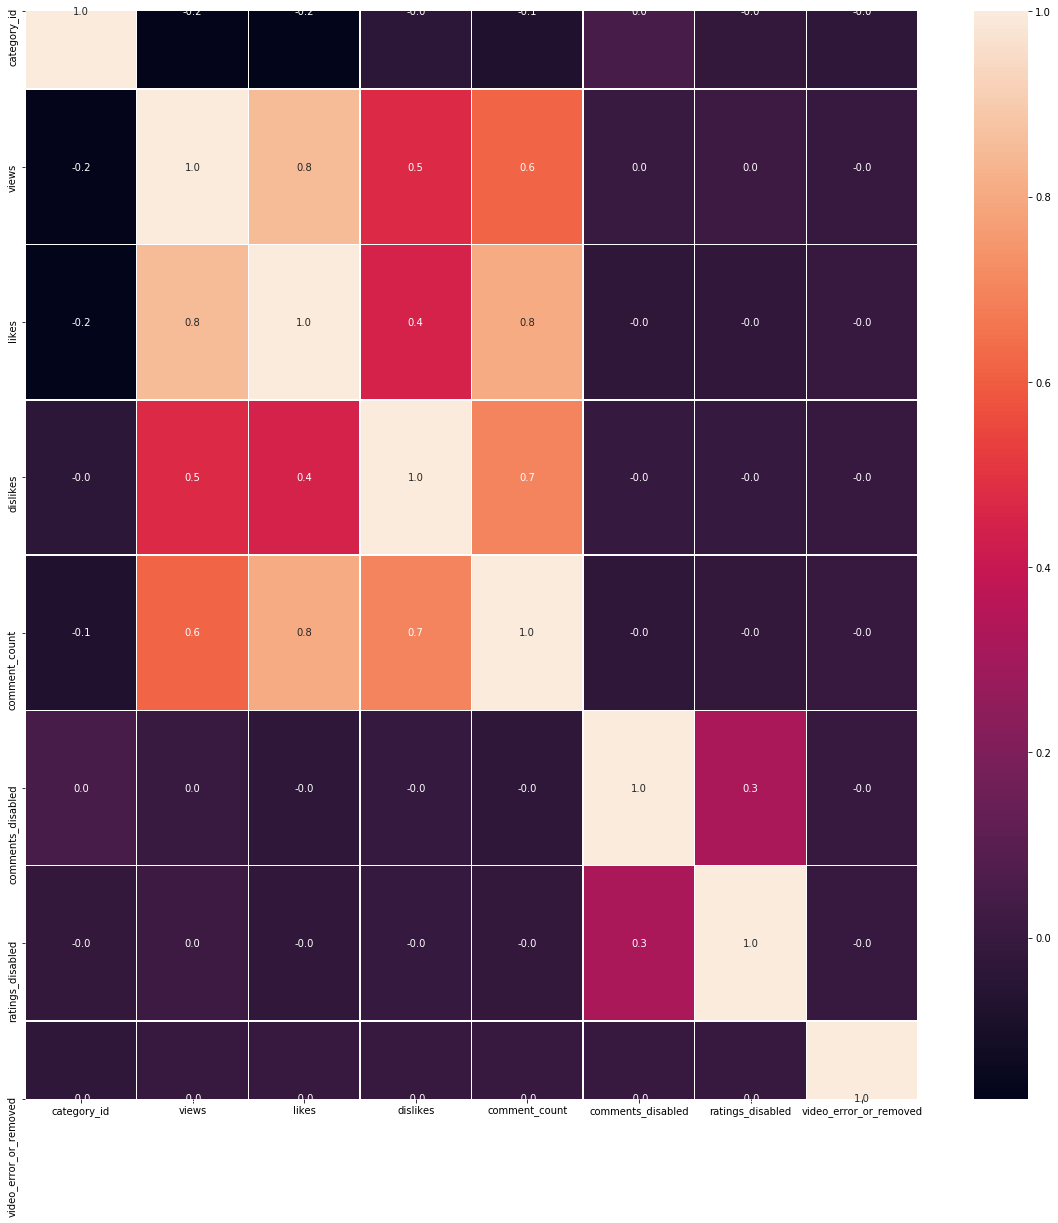

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns  # visualization tool

f,ax = plt.subplots(figsize=(20, 20))
sns.heatmap(data.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)
plt.show()

We can understand that viewers are sharing their opinions if like or dont like  the videos in US Youtube users:)

Now i will make some plot trials:

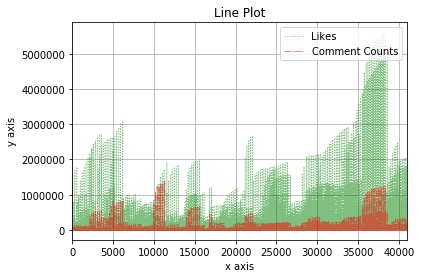

In [25]:
# Line Plot
# color = color, label = label, linewidth = width of line, alpha = opacity, grid = grid, linestyle = sytle of line
data.likes.plot(kind = 'line', color = 'g',label = 'Likes',linewidth=1,alpha = 0.5,grid = True,linestyle = ':')
data.comment_count.plot(color = 'r',label = 'Comment Counts',linewidth=1, alpha = 0.5,grid = True,linestyle = '-.')
plt.legend(loc='upper right')     # legend = puts label into plot
plt.xlabel('x axis')              # label = name of label
plt.ylabel('y axis')
plt.title('Line Plot')            # title = title of plot
plt.show()

I just want to show likes and comment counts relations but line plot doest look good, i will try scatter plot now:

Text(0.5, 1.0, 'Like and Comment Counts Scatter Plot')

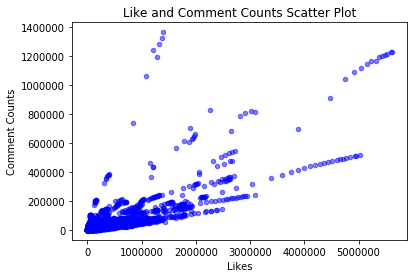

In [17]:
# Scatter Plot 
# x = likes, y = comment counts
data.plot(kind='scatter', x='likes', y='comment_count',alpha = 0.5,color = 'blue')
plt.xlabel('Likes')              # label = name of label
plt.ylabel('Comment Counts')
plt.title('Like and Comment Counts Scatter Plot')            # title = title of plot

With same method i wanna look relationship between dislike and comment count

Text(0.5, 1.0, 'Dislike and Comment Counts Scatter Plot')

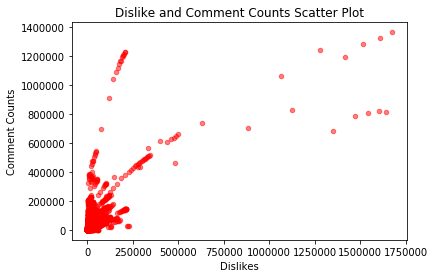

In [10]:
# Scatter Plot 
# x = dislikes, y = comment counts
data.plot(kind='scatter', x='dislikes', y='comment_count',alpha = 0.5,color = 'red')
plt.xlabel('Dislikes')              # label = name of label
plt.ylabel('Comment Counts')
plt.title('Dislike and Comment Counts Scatter Plot')            # title = title of plot

Lets return to data frame and look US youtube players like and dislike videos

In [11]:
# This is also same with previous code line. Therefore we can also use '&' for filtering.
data[(data['likes']>500000) & (data['dislikes']>500000)]

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
4801,FlsCjmMhFmw,17.08.12,YouTube Rewind: The Shape of 2017 | #YouTubeRe...,YouTube Spotlight,24,2017-12-06T17:58:51.000Z,"Rewind|""Rewind 2017""|""youtube rewind 2017""|""#Y...",52611730,1891799,884944,702769,https://i.ytimg.com/vi/FlsCjmMhFmw/default.jpg,False,False,False,"YouTube Rewind 2017. Celebrating the videos, p..."
5020,FlsCjmMhFmw,17.09.12,YouTube Rewind: The Shape of 2017 | #YouTubeRe...,YouTube Spotlight,24,2017-12-06T17:58:51.000Z,"Rewind|""Rewind 2017""|""youtube rewind 2017""|""#Y...",75969469,2251797,1127798,827755,https://i.ytimg.com/vi/FlsCjmMhFmw/default.jpg,False,False,False,"YouTube Rewind 2017. Celebrating the videos, p..."
5236,FlsCjmMhFmw,17.10.12,YouTube Rewind: The Shape of 2017 | #YouTubeRe...,YouTube Spotlight,24,2017-12-06T17:58:51.000Z,"Rewind|""Rewind 2017""|""youtube rewind 2017""|""#Y...",100911567,2656659,1353647,682890,https://i.ytimg.com/vi/FlsCjmMhFmw/default.jpg,False,False,False,"YouTube Rewind 2017. Celebrating the videos, p..."
5452,FlsCjmMhFmw,17.11.12,YouTube Rewind: The Shape of 2017 | #YouTubeRe...,YouTube Spotlight,24,2017-12-06T17:58:51.000Z,"Rewind|""Rewind 2017""|""youtube rewind 2017""|""#Y...",113874632,2811215,1470383,787174,https://i.ytimg.com/vi/FlsCjmMhFmw/default.jpg,False,False,False,"YouTube Rewind 2017. Celebrating the videos, p..."
5699,FlsCjmMhFmw,17.12.12,YouTube Rewind: The Shape of 2017 | #YouTubeRe...,YouTube Spotlight,24,2017-12-06T17:58:51.000Z,"Rewind|""Rewind 2017""|""youtube rewind 2017""|""#Y...",125432237,2912702,1545015,807558,https://i.ytimg.com/vi/FlsCjmMhFmw/default.jpg,False,False,False,"YouTube Rewind 2017. Celebrating the videos, p..."
5935,FlsCjmMhFmw,17.13.12,YouTube Rewind: The Shape of 2017 | #YouTubeRe...,YouTube Spotlight,24,2017-12-06T17:58:51.000Z,"Rewind|""Rewind 2017""|""youtube rewind 2017""|""#Y...",137843120,3014471,1602383,817582,https://i.ytimg.com/vi/FlsCjmMhFmw/default.jpg,False,False,False,"YouTube Rewind 2017. Celebrating the videos, p..."
6181,FlsCjmMhFmw,17.14.12,YouTube Rewind: The Shape of 2017 | #YouTubeRe...,YouTube Spotlight,24,2017-12-06T17:58:51.000Z,"Rewind|""Rewind 2017""|""youtube rewind 2017""|""#Y...",149376127,3093544,1643059,810698,https://i.ytimg.com/vi/FlsCjmMhFmw/default.jpg,False,False,False,"YouTube Rewind 2017. Celebrating the videos, p..."
10000,QwZT7T-TXT0,18.03.01,So Sorry.,Logan Paul Vlogs,24,2018-01-02T16:42:21.000Z,"logan paul vlog|""logan paul""|""logan""|""paul""|""o...",13305605,835378,629120,733373,https://i.ytimg.com/vi/QwZT7T-TXT0/default.jpg,False,False,False,NaN
10202,QwZT7T-TXT0,18.04.01,So Sorry.,Logan Paul Vlogs,24,2018-01-02T16:42:21.000Z,"logan paul vlog|""logan paul""|""logan""|""paul""|""o...",23389090,1082422,1065772,1059651,https://i.ytimg.com/vi/QwZT7T-TXT0/default.jpg,False,False,False,NaN
10415,QwZT7T-TXT0,18.05.01,So Sorry.,Logan Paul Vlogs,24,2018-01-02T16:42:21.000Z,"logan paul vlog|""logan paul""|""logan""|""paul""|""o...",28407744,1204072,1278887,1238817,https://i.ytimg.com/vi/QwZT7T-TXT0/default.jpg,False,False,False,NaN


I curios about them and because 3 of two people liked and one of them dis-like this videos